# 1. Prepare the data

## Import Library and Dataset

In [143]:
# Import necessary libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [144]:
# Load dataset
stock_df = pd.read_csv('stock_trend.csv')

## Exploratory Data Analysis (EDA)

In [145]:
# Inspect first 10 rows
stock_df.head(10)

,Title,Time,Name,Quote,Before,After
0,100 startups participate in Maxis' Market Acce...,2019-12-12T23:50:12+08:00,MAXIS,6012,5.160,5.110
1,16.89% stake in Subur Tiasa traded off-market,2020-02-20T22:41:12+08:00,SUBUR,6904,0.610,0.610
2,Najib wanted 1MDB's Genting Sanyen deal sped u...,2020-07-16T17:42:30+08:00,GENTING,3182,4.080,4.060
3,"25bps OPR cut likely in 2H20, says Manulife",2020-01-16T17:03:43+08:00,MANULFE,1058,2.420,2.420
4,A 25-month extension on concession pushes Phar...,2019-11-11T10:49:58+08:00,PHARMA,7081,2.620,2.430
5,3.7% of Yong Tai transacted off-market,2019-09-05T19:55:54+08:00,YONGTAI,7066,0.195,0.200
6,"3A, Ruberex, Thriven, Kanger, UniWall",2020-03-04T13:23:15+08:00,KANGER,170,0.125,0.120
7,40% stake in IWH-CREC may cost Ekovest RM1.5b,2020-09-16T10:00:00+08:00,EKOVEST,8877,0.610,0.580
8,4.41% Kronologi Asia shares traded off-market,2020-02-12T23:54:51+08:00,KRONO,176,0.895,0.890
9,4.96% of MMAG traded off market,2019-07-23T22:42:17+08:00,MMAG,34,0.245,0.235


In [146]:
# Inspect last 10 rows
stock_df.tail(10)

,Title,Time,Name,Quote,Before,After
24378,"Zhulian, Ancom, Key Asic, George Kent, Johan, ...",2017-10-11T22:33:02+08:00,GKENT,3204,3.230000,3.290000
24379,"Zhulian, Ancom, Key Asic, George Kent, Johan, ...",2017-10-11T22:33:02+08:00,JOHAN,3441,0.260000,0.280000
24380,"Zhulian, Ancom, Key Asic, George Kent, Johan, ...",2017-10-11T22:33:02+08:00,ANCOM,4758,0.620769,0.629451
24381,"Zhulian, Ancom, Key Asic, George Kent, Johan, ...",2017-10-11T22:33:02+08:00,ZHULIAN,5131,1.640000,1.790000
24382,"Zhulian, Ancom, Key Asic, George Kent, Johan, ...",2017-10-11T22:33:02+08:00,DATAPRP,8338,0.335000,0.290000
24383,Zhulian falls 11.01% after 4Q earnings decline...,2018-01-25T09:34:22+08:00,ZHULIAN,5131,1.920000,1.810000
24384,"Zhulian jumps 6.71% on 3Q earnings, dividend",2017-10-12T09:25:06+08:00,ZHULIAN,5131,1.740000,1.790000
24385,"Zhulian may climb higher, says RHB Retail Rese...",2018-01-24T08:23:37+08:00,ZHULIAN,5131,2.100000,2.090000
24386,"Zhulian may rise higher, says RHB Retail Research",2017-11-13T08:22:46+08:00,ZHULIAN,5131,1.900000,1.890000
24387,"Zhulian posts 38% lower 1Q earnings, pays 2 se...",2018-04-18T18:25:04+08:00,ZHULIAN,5131,1.470000,1.420000


In [147]:
# Check the shape of the dataset through row and column
stock_df.shape

(24388, 6)

In [148]:
# Check data types of each column
stock_df.dtypes

Title      object
Time       object
Name       object
Quote       int64
Before    float64
After     float64
dtype: object

In [149]:
# Ensure Quote is string and zero-padded to 4 digits
stock_df["Quote"] = stock_df["Quote"].astype(str).str.zfill(4)

In [150]:
# Check again data types for each column
stock_df.dtypes

Title      object
Time       object
Name       object
Quote      object
Before    float64
After     float64
dtype: object

In [151]:
# Inspect first 10 rows
stock_df.head(10)

,Title,Time,Name,Quote,Before,After
0,100 startups participate in Maxis' Market Acce...,2019-12-12T23:50:12+08:00,MAXIS,6012,5.160,5.110
1,16.89% stake in Subur Tiasa traded off-market,2020-02-20T22:41:12+08:00,SUBUR,6904,0.610,0.610
2,Najib wanted 1MDB's Genting Sanyen deal sped u...,2020-07-16T17:42:30+08:00,GENTING,3182,4.080,4.060
3,"25bps OPR cut likely in 2H20, says Manulife",2020-01-16T17:03:43+08:00,MANULFE,1058,2.420,2.420
4,A 25-month extension on concession pushes Phar...,2019-11-11T10:49:58+08:00,PHARMA,7081,2.620,2.430
5,3.7% of Yong Tai transacted off-market,2019-09-05T19:55:54+08:00,YONGTAI,7066,0.195,0.200
6,"3A, Ruberex, Thriven, Kanger, UniWall",2020-03-04T13:23:15+08:00,KANGER,0170,0.125,0.120
7,40% stake in IWH-CREC may cost Ekovest RM1.5b,2020-09-16T10:00:00+08:00,EKOVEST,8877,0.610,0.580
8,4.41% Kronologi Asia shares traded off-market,2020-02-12T23:54:51+08:00,KRONO,0176,0.895,0.890
9,4.96% of MMAG traded off market,2019-07-23T22:42:17+08:00,MMAG,0034,0.245,0.235


In [152]:
# Check for missing values in the dataset
stock_df.isnull().sum()

Title     0
Time      0
Name      0
Quote     0
Before    0
After     0
dtype: int64

In [153]:
# Summary of statistics for whole dataset
stock_df.describe()

,Before,After
count,24388.000000,24388.000000
mean,2.633888,2.637278
std,7.679378,7.649474
min,0.005000,0.005000
25%,0.475000,0.480000
50%,1.070000,1.070000
75%,3.010000,3.020000
max,159.100006,157.399994


In [154]:
# Summary statistics for stock prices
stock_df[['Before', 'After']].describe()

,Before,After
count,24388.000000,24388.000000
mean,2.633888,2.637278
std,7.679378,7.649474
min,0.005000,0.005000
25%,0.475000,0.480000
50%,1.070000,1.070000
75%,3.010000,3.020000
max,159.100006,157.399994


In [155]:
# Raw Price Movement
# Calculate price movement
stock_df['Price_Movement'] = stock_df['After'] - stock_df['Before']

# Classify price movement direction
# 'up' for increase, 'down' for decrease, 'no_change' for no change
direction = stock_df['Price_Movement'].apply(lambda x: 'up' if x > 0 else ('down' if x < 0 else 'no_change'))

# Count occurrences of each direction
direction.value_counts()


Price_Movement
up           10726
down          9321
no_change     4341
Name: count, dtype: int64

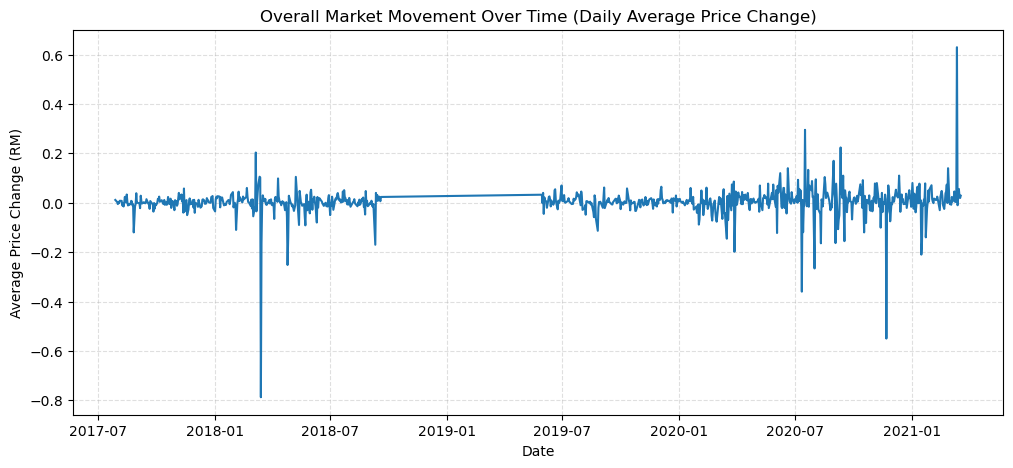

In [156]:
# Create a temporary datetime column 
temp_time = pd.to_datetime(stock_df["Time"])

# Extract date into a temporary variable
temp_date = temp_time.dt.date

# Compute daily average price movement
daily_avg_movement = stock_df["Price_Movement"].groupby(temp_date).mean()

# Plot
plt.figure(figsize=(12,5))
daily_avg_movement.plot()

plt.title("Overall Market Movement Over Time (Daily Average Price Change)")
plt.xlabel("Date")
plt.ylabel("Average Price Change (RM)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()



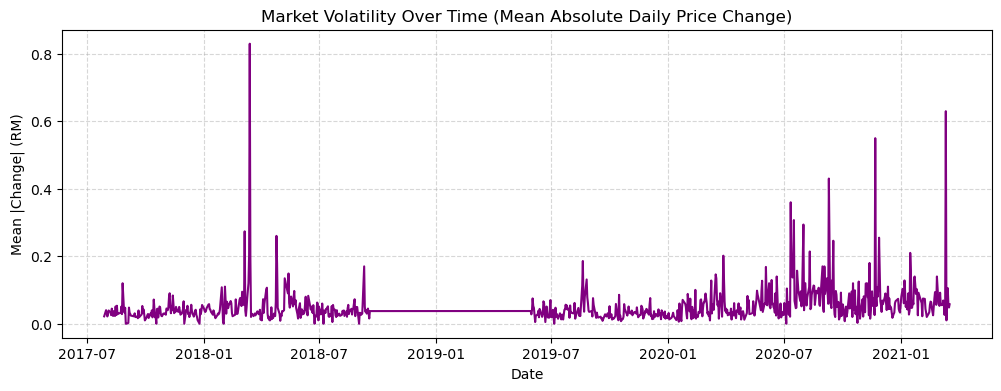

In [157]:
# Create a temporary absolute change Series
temp_abs_change = stock_df["Price_Movement"].abs()

# Create a temporary datetime column
temp_time = pd.to_datetime(stock_df["Time"])
temp_date = temp_time.dt.date

# Group by date to get daily mean absolute price change
daily_vol = temp_abs_change.groupby(temp_date).mean()

# Plot
plt.figure(figsize=(12,4))
daily_vol.plot(color="purple")

plt.title("Market Volatility Over Time (Mean Absolute Daily Price Change)")
plt.xlabel("Date")
plt.ylabel("Mean |Change| (RM)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Data Preprocessing

### Compute Relative Price Change (%)

In [158]:
# Compute relative price change percentage
stock_df["Relative_Price_Change"] = (stock_df["Price_Movement"] / stock_df["Before"]) * 100

# Inspect first 10 rows with new columns
stock_df.head(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change
0,100 startups participate in Maxis' Market Acce...,2019-12-12T23:50:12+08:00,MAXIS,6012,5.160,5.110,-0.050,-0.968992
1,16.89% stake in Subur Tiasa traded off-market,2020-02-20T22:41:12+08:00,SUBUR,6904,0.610,0.610,0.000,0.000000
2,Najib wanted 1MDB's Genting Sanyen deal sped u...,2020-07-16T17:42:30+08:00,GENTING,3182,4.080,4.060,-0.020,-0.490196
3,"25bps OPR cut likely in 2H20, says Manulife",2020-01-16T17:03:43+08:00,MANULFE,1058,2.420,2.420,0.000,0.000000
4,A 25-month extension on concession pushes Phar...,2019-11-11T10:49:58+08:00,PHARMA,7081,2.620,2.430,-0.190,-7.251908
5,3.7% of Yong Tai transacted off-market,2019-09-05T19:55:54+08:00,YONGTAI,7066,0.195,0.200,0.005,2.564103
6,"3A, Ruberex, Thriven, Kanger, UniWall",2020-03-04T13:23:15+08:00,KANGER,0170,0.125,0.120,-0.005,-4.000000
7,40% stake in IWH-CREC may cost Ekovest RM1.5b,2020-09-16T10:00:00+08:00,EKOVEST,8877,0.610,0.580,-0.030,-4.918033
8,4.41% Kronologi Asia shares traded off-market,2020-02-12T23:54:51+08:00,KRONO,0176,0.895,0.890,-0.005,-0.558659
9,4.96% of MMAG traded off market,2019-07-23T22:42:17+08:00,MMAG,0034,0.245,0.235,-0.010,-4.081633


### Label Function

In [159]:
# Label Function
def label_trend(percentage_change):
    if percentage_change > 10:
        return 'uptrend'
    elif percentage_change < -10:
        return 'downtrend'
    else:
        return 'flat'

### Assign Label

In [160]:
# Apply labeling function to create 'Trend_Label' column
stock_df['Trend_Label'] = stock_df['Relative_Price_Change'].apply(label_trend)

# Inspect first 10 rows with Trend_Label
stock_df.head(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change,Trend_Label
0,100 startups participate in Maxis' Market Acce...,2019-12-12T23:50:12+08:00,MAXIS,6012,5.160,5.110,-0.050,-0.968992,flat
1,16.89% stake in Subur Tiasa traded off-market,2020-02-20T22:41:12+08:00,SUBUR,6904,0.610,0.610,0.000,0.000000,flat
2,Najib wanted 1MDB's Genting Sanyen deal sped u...,2020-07-16T17:42:30+08:00,GENTING,3182,4.080,4.060,-0.020,-0.490196,flat
3,"25bps OPR cut likely in 2H20, says Manulife",2020-01-16T17:03:43+08:00,MANULFE,1058,2.420,2.420,0.000,0.000000,flat
4,A 25-month extension on concession pushes Phar...,2019-11-11T10:49:58+08:00,PHARMA,7081,2.620,2.430,-0.190,-7.251908,flat
5,3.7% of Yong Tai transacted off-market,2019-09-05T19:55:54+08:00,YONGTAI,7066,0.195,0.200,0.005,2.564103,flat
6,"3A, Ruberex, Thriven, Kanger, UniWall",2020-03-04T13:23:15+08:00,KANGER,0170,0.125,0.120,-0.005,-4.000000,flat
7,40% stake in IWH-CREC may cost Ekovest RM1.5b,2020-09-16T10:00:00+08:00,EKOVEST,8877,0.610,0.580,-0.030,-4.918033,flat
8,4.41% Kronologi Asia shares traded off-market,2020-02-12T23:54:51+08:00,KRONO,0176,0.895,0.890,-0.005,-0.558659,flat
9,4.96% of MMAG traded off market,2019-07-23T22:42:17+08:00,MMAG,0034,0.245,0.235,-0.010,-4.081633,flat


### Check the class distribution for Trend_Label

In [161]:
# Count occurrences of each trend label
stock_df['Trend_Label'].value_counts()

Trend_Label
flat         22626
uptrend       1232
downtrend      530
Name: count, dtype: int64

### Split dataset into train(70%), validate(20%) and test(10%)

In [162]:
# Split dataset into train, validate and test sets
train_df, temp_df = train_test_split(stock_df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=1/3, random_state=42)

print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))

Train size: 17071
Validation size: 4878
Test size: 2439


In [163]:
# Inspect first 10 rows of training set
train_df.head(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change,Trend_Label
5453,Hospital bed supplier LKL plans Covid-19 conta...,2021-02-09T13:32:13+08:00,LKL,0182,0.760000,0.765000,0.005000,0.657895,flat
5230,Higher taxation squeezes Hibiscus Petroleum’s ...,2020-02-25T21:40:28+08:00,HIBISCS,5199,0.880000,0.845000,-0.035000,-3.977273,flat
20866,Rosy prospects seen to remain for Sunway,2018-03-29T11:00:28+08:00,SUNWAY,5211,1.539064,1.548867,0.009803,0.636946,flat
4021,"FGV, MSM, Kerjaya Prospek, APFT, Dolphin Inter...",2020-01-08T23:21:39+08:00,KERJAYA,7161,1.257425,1.277227,0.019802,1.574806,flat
10299,Straits Inter Logistics up 4.44% on oil tanker...,2019-06-17T10:52:19+08:00,STRAITS,0080,0.225000,0.230000,0.005000,2.222222,flat
13317,Berjaya Assets may announce new venture with A...,2017-08-08T16:47:56+08:00,BJCORP,3395,0.312500,0.317307,0.004807,1.538240,flat
19036,MK Land set to sell off RM362.9m worth of unso...,2017-12-13T15:38:41+08:00,MKLAND,8893,0.235000,0.240000,0.005000,2.127660,flat
6228,Key Alliance plans rights issue with warrants ...,2020-08-06T22:29:22+08:00,KGROUP,0036,0.102857,0.094285,-0.008572,-8.333900,flat
19105,"MMS Ventures, Palette Multimedia, Xinghe, Poh ...",2017-08-29T14:44:58+08:00,XINGHE,0095,0.360000,0.360000,0.000000,0.000000,flat
17758,Kejuruteraan Asastera seeks acquisitions,2018-05-21T08:55:13+08:00,KAB,0193,0.103688,0.105682,0.001994,1.923077,flat


In [164]:
# Inspect first 10 rows of validation set
val_df.head(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change,Trend_Label
4286,"Gamuda, KNM, Kerjaya Prospek, Apex Equity, Ser...",2019-10-02T23:39:00+08:00,AIRASIA,5099,1.740000,1.700000,-0.040000,-2.298851,flat
20505,"Public Bank, Press Metal, KLCCP, CIMB Group, P...",2018-08-15T23:17:10+08:00,CIMB,1023,5.880000,5.880000,0.000000,0.000000,flat
3579,"Duopharma, Pharmaniaga, Atrium REIT, PNE PCB, ...",2021-01-26T23:37:37+08:00,CIHLDG,2828,1.840000,1.900000,0.060000,3.260870,flat
462,"AirAsia, AAX pay MAHB RM41.55m in uncollected PSC",2019-09-19T19:26:03+08:00,AIRASIA,5099,1.790000,1.810000,0.020000,1.117318,flat
22179,Stock With Momentum: NTPM Holdings,2018-05-21T10:46:59+08:00,NTPM,5066,0.645000,0.650000,0.005000,0.775194,flat
4832,Great Eastern buys 22% ‘strategic’ stake in Ax...,2020-06-25T18:08:36+08:00,AXIATA,6888,3.390000,3.460000,0.070000,2.064897,flat
16647,Hap Seng ‘underestimated’ due diligence needed...,2018-05-31T09:06:18+08:00,KRETAM,1996,0.800000,0.800000,0.000000,0.000000,flat
15903,"F&N, Nestle, Gas Malaysia, Sime Darby, GHL, Ha...",2017-11-08T00:47:18+08:00,KGROUP,0036,0.145714,0.149999,0.004285,2.940692,flat
20820,RHB Research starts coverage on Southern Acids...,2017-10-04T09:04:26+08:00,SAB,5134,4.580000,4.600000,0.020000,0.436681,flat
12860,Apex Equity appoints former IGP as director,2018-03-26T20:27:59+08:00,APEX,5088,1.038095,1.028571,-0.009524,-0.917450,flat


In [165]:
# Inspect first 10 rows of test set
test_df.head(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change,Trend_Label
2334,Cahya Mata Sarawak jumps among Bursa top gainers,2019-10-24T09:50:30+08:00,CMSB,2852,2.360000,2.440000,0.080000,3.389831,flat
20413,"Priceworth, TFP Solutions, TNB, FGV, Alam Mari...",2018-09-06T23:36:06+08:00,TFP,0145,0.125000,0.115000,-0.010000,-8.000000,flat
17465,IOI Prop scraps agreement with Hongkong Land,2018-03-14T09:38:49+08:00,IOICORP,1961,4.870000,4.860000,-0.010000,-0.205339,flat
2240,Bumper 1Q for glove maker Supermax as net prof...,2020-10-27T18:25:18+08:00,SUPERMX,7106,9.567393,9.244567,-0.322826,-3.374232,flat
6918,"LPI Capital 4Q earnings inch higher, declares ...",2020-02-03T18:13:56+08:00,LPI,8621,14.800000,15.060000,0.260000,1.756757,flat
8692,Phase 2A of Mah Sing’s Carya @ M Aruna 90% tak...,2020-12-22T18:01:17+08:00,MAHSING,8583,0.885000,0.885000,0.000000,0.000000,flat
21085,Sapura Energy’s rights issue to create value f...,2018-08-26T22:20:39+08:00,SAPNRG,5218,0.375000,0.350000,-0.025000,-6.666667,flat
9246,REDtone ups stake in 7-Eleven Malaysia,2020-07-24T22:28:05+08:00,SEM,5250,1.360000,1.370000,0.010000,0.735294,flat
5135,"Hengyuan, Cycle & Carriage, Digistar, Eco Worl...",2020-12-08T14:25:51+08:00,GREENYB,0136,0.195000,0.190000,-0.005000,-2.564103,flat
11614,US Customs didn't give Sime Darby Plantation c...,2020-12-31T16:33:09+08:00,SIMEPLT,5285,5.080000,4.990000,-0.090000,-1.771654,flat


In [166]:
stock_df.sample(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change,Trend_Label
20945,Salcon gets RM19m mixed development contract,2018-01-30T18:55:10+08:00,SALCON,8567,0.347613,0.35135,0.003737,1.075046,flat
10781,"Tek Seng in process of extending upward move, ...",2020-10-02T08:10:51+08:00,TEKSENG,7200,0.780000,0.78500,0.005000,0.641026,flat
14742,Credit Suisse buys 5.17% stake in Permaju Indu...,2017-09-26T14:50:45+08:00,PERMAJU,7080,0.340000,0.35000,0.010000,2.941176,flat
23549,UMW Toyota’s pre-owned vehicles division rebra...,2017-08-14T16:48:43+08:00,UMW,4588,5.750000,5.78000,0.030000,0.521739,flat
13898,"Cahya Mata Sarawak, FGV, IOI Corp, Scomi Engin...",2018-02-23T22:52:32+08:00,CMSB,2852,4.370000,4.31000,-0.060000,-1.372998,flat
12069,"YTL Hospitality REIT 2Q20 NPI up 2.4%, declare...",2020-02-20T21:55:42+08:00,YTLREIT,5109,1.370000,1.33000,-0.040000,-2.919708,flat
1606,"BAT, GDB, Econpile, Gas Malaysia, Formosa Pros...",2019-11-15T00:47:16+08:00,AXIATA,6888,4.260000,4.27000,0.010000,0.234742,flat
24184,Y&G aborts plan to buy RM31m land in Pontian,2018-06-19T10:12:04+08:00,Y&G,7003,0.950000,0.95000,0.000000,0.000000,flat
22090,Stock With Momentum: Kumpulan Perangsang Selan...,2018-07-24T10:38:57+08:00,KPS,5843,2.030000,1.98000,-0.050000,-2.463054,flat
18247,"Lotte Chemical, Luxchem, MBM Resources, UMW Ho...",2018-04-30T23:04:40+08:00,CENSOF,5195,0.200000,0.20000,0.000000,0.000000,flat



# 3. Stock trend prediction with pretrained Transformer


In [167]:
# If needed, install dependencies (run once)
# !pip install transformers datasets accelerate scikit-learn pandas


In [ ]:
from gettext import install


pip install "transformers==4.40.2" "huggingface-hub==0.22.2" "tokenizers==0.19.1" "safetensors>=0.4.2"

Note: you may need to restart the kernel to use updated packages.


In [169]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, set_seed

set_seed(42)


In [170]:
import torch
print('CUDA available:', torch.cuda.is_available())
print('CUDA device count:', torch.cuda.device_count())
if torch.cuda.is_available():
    print('CUDA device:', torch.cuda.get_device_name(0))


CUDA available: True
CUDA device count: 1
CUDA device: NVIDIA GeForce RTX 5050 Laptop GPU


In [171]:
# Load data
df = pd.read_csv('stock_trend.csv')

# Compute relative price change (%) and label
df['Rel_Change'] = (df['After'] - df['Before']) / df['Before'] * 100

def label_trend(x):
    if x > 10:
        return 'uptrend'
    if x < -10:
        return 'downtrend'
    return 'flat'

df['Trend_Label'] = df['Rel_Change'].apply(label_trend)

# Use the news title as input text; you can also concatenate other fields if desired
df['text'] = df['Title'].astype(str)

label2id = {'downtrend': 0, 'flat': 1, 'uptrend': 2}
id2label = {v: k for k, v in label2id.items()}
df['label'] = df['Trend_Label'].map(label2id)

# Split data: 70% train, 20% validation, 10% test
train_df, temp_df = train_test_split(
    df, test_size=0.30, random_state=42, stratify=df['label']
)
val_df, test_df = train_test_split(
    temp_df, test_size=1/3, random_state=42, stratify=temp_df['label']
)

print('Train/Val/Test sizes:', len(train_df), len(val_df), len(test_df))


Train/Val/Test sizes: 17071 4878 2439


In [172]:
# Compute class weights from training data
import torch
class_counts = train_df['label'].value_counts().sort_index().values
class_weights = (class_counts.sum() / (len(class_counts) * class_counts)).astype('float32')
class_weights = torch.tensor(class_weights)
print('Class counts:', class_counts)
print('Class weights:', class_weights.tolist())


Class counts: [  371 15838   862]
Class weights: [15.337825775146484, 0.35928356647491455, 6.601314544677734]


In [173]:
# Convert to Hugging Face Datasets
train_ds = Dataset.from_pandas(train_df[['text', 'label']].reset_index(drop=True))
val_ds = Dataset.from_pandas(val_df[['text', 'label']].reset_index(drop=True))
test_ds = Dataset.from_pandas(test_df[['text', 'label']].reset_index(drop=True))


In [174]:
# Tokenizer and model
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

def tokenize_fn(batch):
    return tokenizer(batch['text'], padding='max_length', truncation=True, max_length=128)

train_tok = train_ds.map(tokenize_fn, batched=True)
val_tok = val_ds.map(tokenize_fn, batched=True)
test_tok = test_ds.map(tokenize_fn, batched=True)

train_tok = train_tok.remove_columns(['text'])
val_tok = val_tok.remove_columns(['text'])
test_tok = test_tok.remove_columns(['text'])

train_tok.set_format('torch')
val_tok.set_format('torch')
test_tok.set_format('torch')

model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=3, label2id=label2id, id2label=id2label
)


Map:   0%|          | 0/17071 [00:00<?, ? examples/s]

Map:   0%|          | 0/4878 [00:00<?, ? examples/s]

Map:   0%|          | 0/2439 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [175]:
# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }


In [176]:
# Training
import torch
from transformers import Trainer, EarlyStoppingCallback
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get('labels')
        outputs = model(**inputs)
        logits = outputs.get('logits')
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss
training_args = TrainingArguments(
    output_dir='transformer_stock_trend',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    seed=42,
)
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_tok,
    eval_dataset=val_tok,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)
trainer.train()


  0%|          | 0/3201 [00:00<?, ?it/s]

{'loss': 1.0222, 'grad_norm': 12.406580924987793, 'learning_rate': 1.6875976257419557e-05, 'epoch': 0.47}
{'loss': 1.0519, 'grad_norm': 3.089662551879883, 'learning_rate': 1.3751952514839112e-05, 'epoch': 0.94}


  0%|          | 0/153 [00:00<?, ?it/s]

c:\Users\tantj\anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


{'eval_loss': 1.210096001625061, 'eval_accuracy': 0.8638786387863878, 'eval_precision': 0.373624149384073, 'eval_recall': 0.4252512283684136, 'eval_f1': 0.3885577010176364, 'eval_runtime': 23.3421, 'eval_samples_per_second': 208.979, 'eval_steps_per_second': 6.555, 'epoch': 1.0}
{'loss': 0.9991, 'grad_norm': 7.29429817199707, 'learning_rate': 1.0627928772258671e-05, 'epoch': 1.41}
{'loss': 0.957, 'grad_norm': 4.172774791717529, 'learning_rate': 7.503905029678226e-06, 'epoch': 1.87}


  0%|          | 0/153 [00:00<?, ?it/s]

{'eval_loss': 1.2045964002609253, 'eval_accuracy': 0.8593685936859369, 'eval_precision': 0.4235338409825491, 'eval_recall': 0.46199567188907004, 'eval_f1': 0.4306563513733425, 'eval_runtime': 23.349, 'eval_samples_per_second': 208.917, 'eval_steps_per_second': 6.553, 'epoch': 2.0}
{'loss': 0.8975, 'grad_norm': 37.74273681640625, 'learning_rate': 4.379881287097782e-06, 'epoch': 2.34}
{'loss': 0.8859, 'grad_norm': 4.83543062210083, 'learning_rate': 1.2558575445173386e-06, 'epoch': 2.81}


  0%|          | 0/153 [00:00<?, ?it/s]

{'eval_loss': 1.4201438426971436, 'eval_accuracy': 0.8778187781877819, 'eval_precision': 0.4328109590060087, 'eval_recall': 0.4479743650235292, 'eval_f1': 0.43672770022375823, 'eval_runtime': 23.3447, 'eval_samples_per_second': 208.955, 'eval_steps_per_second': 6.554, 'epoch': 3.0}
{'train_runtime': 812.3154, 'train_samples_per_second': 63.046, 'train_steps_per_second': 3.941, 'train_loss': 0.9577477838575226, 'epoch': 3.0}


TrainOutput(global_step=3201, training_loss=0.9577477838575226, metrics={'train_runtime': 812.3154, 'train_samples_per_second': 63.046, 'train_steps_per_second': 3.941, 'total_flos': 1696043467830528.0, 'train_loss': 0.9577477838575226, 'epoch': 3.0})

In [177]:
# Evaluate on validation and test sets
val_metrics = trainer.evaluate(eval_dataset=val_tok)
test_metrics = trainer.evaluate(eval_dataset=test_tok)

print('Validation metrics:', val_metrics)
print('Test metrics:', test_metrics)


  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

Validation metrics: {'eval_loss': 1.4201438426971436, 'eval_accuracy': 0.8778187781877819, 'eval_precision': 0.4328109590060087, 'eval_recall': 0.4479743650235292, 'eval_f1': 0.43672770022375823, 'eval_runtime': 23.2555, 'eval_samples_per_second': 209.757, 'eval_steps_per_second': 6.579, 'epoch': 3.0}
Test metrics: {'eval_loss': 1.3986845016479492, 'eval_accuracy': 0.8769987699876999, 'eval_precision': 0.41758269951303334, 'eval_recall': 0.43034863860673894, 'eval_f1': 0.4217287065757785, 'eval_runtime': 11.7537, 'eval_samples_per_second': 207.51, 'eval_steps_per_second': 6.551, 'epoch': 3.0}


  0%|          | 0/77 [00:00<?, ?it/s]

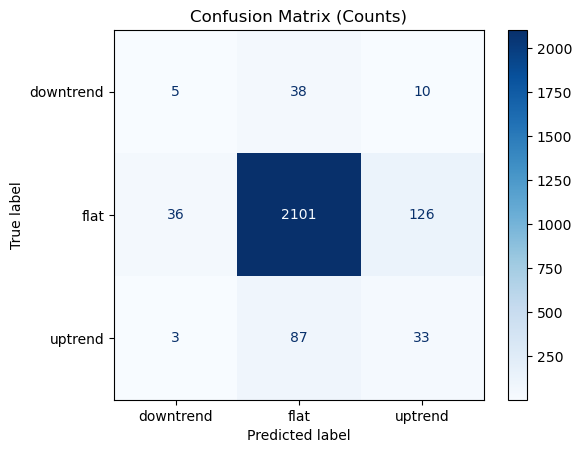

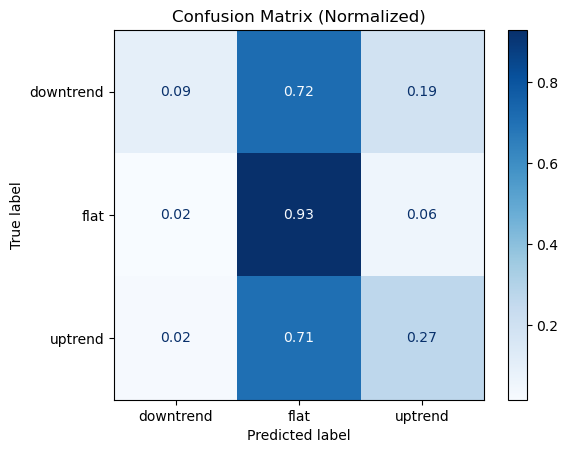

In [178]:
# Confusion matrix on test set (counts + normalized)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

test_preds = trainer.predict(test_tok)
y_true = test_preds.label_ids
y_pred = test_preds.predictions.argmax(axis=1)

labels = [0, 1, 2]
display_labels = [id2label[i] for i in labels]

cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Counts)')
plt.show()

cm_norm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=display_labels)
disp_norm.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (Normalized)')
plt.show()
